In [19]:
        #importing libraries
        import pandas as pd
        import matplotlib.pyplot as plt
        import numpy as np
        from sklearn.preprocessing import Imputer

In [20]:
#loading in the dataframe and looking at the data
food = pd.read_csv(r'C:\Users\Jeshu\Downloads\Dataset\archive\food_order.csv')
food.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [21]:
#drop the order id and the customer id since it is not relevant at the moment
n = 2
food.drop(columns=food.columns[:n], axis=1,  inplace=True)
food.head()

,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [22]:
#checking if the data has any missing values
has_na = food.isna().any().any()
if has_na:
    print("The DataFrame contains missing values.")
else:
    print("The DataFrame does not contain any missing values.")

The DataFrame does not contain any missing values.


In [23]:
#checking for unique values that might need to be changed an/or deleted this is done with the unique feature
food['restaurant_name'].unique()

array(['Hangawi', 'Blue Ribbon Sushi Izakaya', 'Cafe Habana',
       'Blue Ribbon Fried Chicken', 'Dirty Bird to Go',
       'Tamarind TriBeCa', 'The Meatball Shop', 'Barbounia',
       'Anjappar Chettinad', 'Bukhara Grill',
       'Big Wong Restaurant \x8c_¤¾Ñ¼', 'Empanada Mama (closed)', 'Pylos',
       "Lucky's Famous Burgers", 'Shake Shack', 'Sushi of Gari',
       'RedFarm Hudson', 'Blue Ribbon Sushi',
       'Five Guys Burgers and Fries', 'Tortaria', 'Cafe Mogador',
       'Otto Enoteca Pizzeria', 'Vezzo Thin Crust Pizza',
       'Sushi of Gari 46', 'The Kati Roll Company', 'Klong',
       '5 Napkin Burger', 'TAO', 'Parm', 'Sushi Samba',
       'Haru Gramercy Park', 'Chipotle Mexican Grill $1.99 Delivery',
       'RedFarm Broadway', 'Cafeteria', 'DuMont Burger',
       "Sarabeth's East", 'Hill Country Fried Chicken', 'Bistango',
       "Jack's Wife Freda", "Mamoun's Falafel", 'Prosperity Dumpling',
       'Blue Ribbon Sushi Bar & Grill', 'Westville Hudson',
       'Blue Ribbon Br

In [24]:
#replacing the wrong/ invalid restaurant names
food.restaurant_name =  food.restaurant_name.replace(to_replace=['Big Wong Restaurant \x8c_¤¾Ñ¼', 'Chipotle Mexican Grill $1.99 Delivery', "Joe's Shanghai \x8e_À\x8eü£¾÷´"],
                             value=['Big Wong Restaurant', 'Chipotle Mexican Grill', "Joe's Shanghai"])
food['restaurant_name'].unique()

array(['Hangawi', 'Blue Ribbon Sushi Izakaya', 'Cafe Habana',
       'Blue Ribbon Fried Chicken', 'Dirty Bird to Go',
       'Tamarind TriBeCa', 'The Meatball Shop', 'Barbounia',
       'Anjappar Chettinad', 'Bukhara Grill', 'Big Wong Restaurant',
       'Empanada Mama (closed)', 'Pylos', "Lucky's Famous Burgers",
       'Shake Shack', 'Sushi of Gari', 'RedFarm Hudson',
       'Blue Ribbon Sushi', 'Five Guys Burgers and Fries', 'Tortaria',
       'Cafe Mogador', 'Otto Enoteca Pizzeria', 'Vezzo Thin Crust Pizza',
       'Sushi of Gari 46', 'The Kati Roll Company', 'Klong',
       '5 Napkin Burger', 'TAO', 'Parm', 'Sushi Samba',
       'Haru Gramercy Park', 'Chipotle Mexican Grill', 'RedFarm Broadway',
       'Cafeteria', 'DuMont Burger', "Sarabeth's East",
       'Hill Country Fried Chicken', 'Bistango', "Jack's Wife Freda",
       "Mamoun's Falafel", 'Prosperity Dumpling',
       'Blue Ribbon Sushi Bar & Grill', 'Westville Hudson',
       'Blue Ribbon Brooklyn', 'Nobu Next Door', 'Oste

In [25]:
#Checking if the cuisine type has any wrong values
food['cuisine_type'].unique()

array(['Korean', 'Japanese', 'Mexican', 'American', 'Indian', 'Italian',
       'Mediterranean', 'Chinese', 'Middle Eastern', 'Thai', 'Southern',
       'French', 'Spanish', 'Vietnamese'], dtype=object)

In [26]:
#Checking if the day_of_the_week has any wrong values
food['day_of_the_week'].unique()
food['day_of_the_week'].value_counts()

Weekend    1351
Weekday     547
Name: day_of_the_week, dtype: int64

In [27]:
#Checking if the rating has any wrong values
food['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

In [28]:
#getting all the nummeric columns from the dataset
num_feature=[feature for feature in food.columns if food[feature].dtype!='O']
print(num_feature)

['cost_of_the_order', 'food_preparation_time', 'delivery_time']


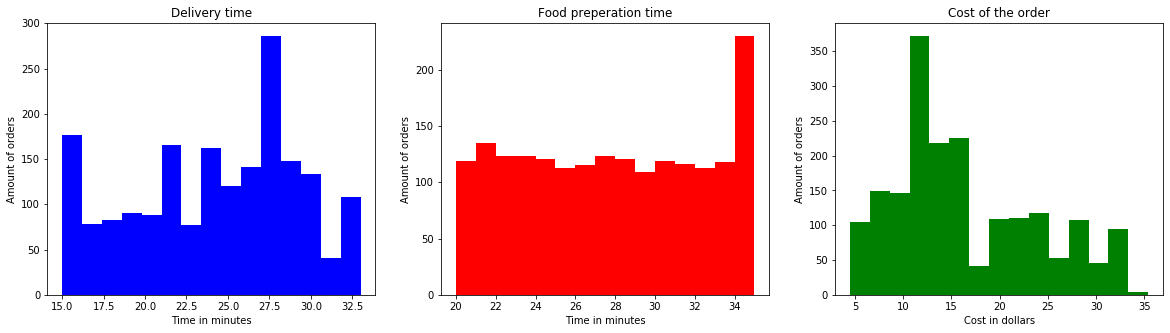

In [29]:
#visualizing the nummeric data in subplots
fig, ax = plt.subplots(1, 3)
fig.set_figheight(5)
fig.set_figwidth(20)
ax[0].hist(food['delivery_time'], bins=15, color='blue')
ax[0].set_title('Delivery time')
ax[0].set_ylabel('Amount of orders')
ax[0].set_xlabel('Time in minutes')

ax[1].hist(food['food_preparation_time'], bins=15, color='red')
ax[1].set_title('Food preperation time')
ax[1].set_ylabel('Amount of orders')
ax[1].set_xlabel('Time in minutes')

ax[2].hist(food['cost_of_the_order'], bins=15, color='green')
ax[2].set_ylabel('Amount of orders')
ax[2].set_xlabel('Cost in dollars')
ax[2].set_title('Cost of the order')
plt.show()

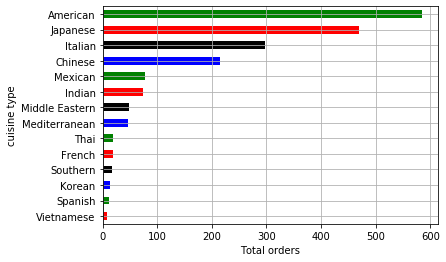

In [30]:
#Plotting the cuisine type data
food['cuisine_type'].value_counts().sort_values(ascending=True).plot(kind='barh', align='center', color=['red', 'green', 'blue', 'black'])
plt.ylabel('cuisine type')
plt.xlabel('Total orders')
plt.grid()
plt.show()

In [31]:
#selecting only the American or Japanese restuarants so we kan fit a knn classifier
food_knn = food[['cuisine_type','cost_of_the_order', 'food_preparation_time', 'delivery_time']]
food_knn_am_jap = food_knn[(food_knn['cuisine_type'] == 'Japanese') | (food_knn['cuisine_type'] == 'American')]
print(food_knn_am_jap)

     cuisine_type  cost_of_the_order  food_preparation_time  delivery_time
1        Japanese              12.08                     25             23
3        American              29.20                     25             15
4        American              11.59                     25             24
12       American              24.30                     23             17
14       American              12.13                     23             30
15       American              16.20                     33             25
16       Japanese              16.98                     30             16
17       Japanese              33.03                     21             22
19       Japanese              16.20                     35             26
20       American              24.20                     21             24
21       American              15.91                     25             20
22       American              29.10                     21             30
29       Japanese        

In [32]:
#looking if there is a probability to predict wheter is is a Japanese or american restaurant based on the cost of the order, food preperation time and delivery time
#Probably not, but we are just having fun with the dataset!
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

y = food_knn_am_jap['cuisine_type'].values
X = food_knn_am_jap.drop('cuisine_type', axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=20, stratify=y)

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train,y_train)
print(knn.score(X_test, y_test))
y_pred = knn.predict(X)

print(y_pred)
food_knn_am_jap.head()

0.5402843601895735
['American' 'Japanese' 'American' ... 'American' 'Japanese' 'American']


,cuisine_type,cost_of_the_order,food_preparation_time,delivery_time
1,Japanese,12.08,25,23
3,American,29.20,25,15
4,American,11.59,25,24
12,American,24.30,23,17
14,American,12.13,23,30


In [33]:
#Seeing if we can predict the day of the week
food_day = food[['day_of_the_week','cost_of_the_order', 'food_preparation_time', 'delivery_time']]
y = food_day['day_of_the_week'].values
X = food_day.drop('day_of_the_week', axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=55, stratify=y)

knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train,y_train)
print(knn.score(X_test, y_test))
y_pred = knn.predict(X)

print(y_pred)
food_day.head()

0.7578947368421053
['Weekend' 'Weekend' 'Weekend' ... 'Weekday' 'Weekday' 'Weekday']


,day_of_the_week,cost_of_the_order,food_preparation_time,delivery_time
0,Weekend,30.75,25,20
1,Weekend,12.08,25,23
2,Weekday,12.23,23,28
3,Weekend,29.20,25,15
4,Weekday,11.59,25,24


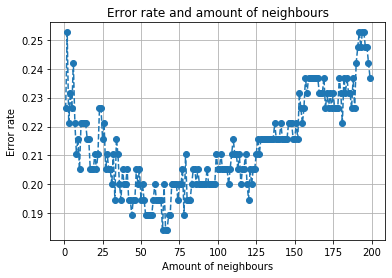

Minimum error:- 0.18421052631578946 at K = 63


In [34]:
#calculating the optimum amount of neighbours
error_rate=[]
for i in range(1,200):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    error_rate.append(np.mean(y_pred != y_test))
    
plt.plot(range(1,200), error_rate, linestyle='dashed', marker='o')
plt.title('Error rate and amount of neighbours')
plt.xlabel('Amount of neighbours')
plt.ylabel('Error rate')
plt.grid()
plt.show()
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

In [35]:
#checking if there are duplicated rows in the dataset
duplicated_rows=food[food.duplicated()]
print(f'Amount of Duplicated Rows Present in the dataset: {duplicated_rows.shape[0]}')

Amount of Duplicated Rows Present in the dataset: 0


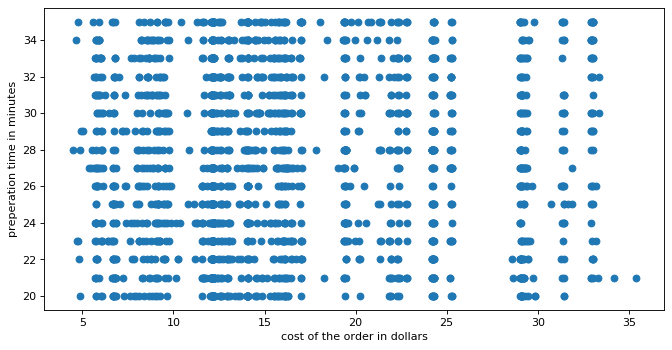

In [36]:
from matplotlib.pyplot import figure
figure(figsize=(10,5), dpi=80)
plt.scatter(food['cost_of_the_order'], food['food_preparation_time'])
plt.ylabel('preperation time in minutes')
plt.xlabel('cost of the order in dollars')
plt.show()

In [37]:
imp = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)
clf = SVC()
steps = o

D:\Schoolwerk\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


NameError: name 'SVC' is not defined